In [21]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hHfvBQknhyDvz9dn4LP0oFyYdDVSw4Q6A0oKm6TPDIWA',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'hotelbookinganalysis-donotdelete-pr-znyhhvzbmtlnq4'
object_key = 'hotel_bookings.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head(10)



,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
5,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15
6,6,Resort Hotel,0,0,2015,July,27,1,0,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03-07-15
7,7,Resort Hotel,0,9,2015,July,27,1,0,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03-07-15
8,8,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-15
9,9,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-15


In [14]:
# Display the first few rows and general information about the dataset
print("First few rows of the dataset:")
print(df.head())


# Exploratory Data Analysis (EDA)


First few rows of the dataset:
   index         hotel  is_canceled  lead_time  arrival_date_year  \
0      0  Resort Hotel            0        342               2015   
1      1  Resort Hotel            0        737               2015   
2      2  Resort Hotel            0          7               2015   
3      3  Resort Hotel            0         13               2015   
4      4  Resort Hotel            0         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type  agent  \
0            

In [15]:
print("\nGeneral information about the dataset:")
print(df.info())


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   index                           119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386

In [16]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               index    is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean    59694.500000       0.370416     104.011416        2016.156554   
std     34465.068657       0.482918     106.863097           0.707476   
min         0.000000       0.000000       0.000000        2015.000000   
25%     29847.250000       0.000000      18.000000        2016.000000   
50%     59694.500000       0.000000      69.000000        2016.000000   
75%     89541.750000       1.000000     160.000000        2017.000000   
max    119389.000000       1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%        

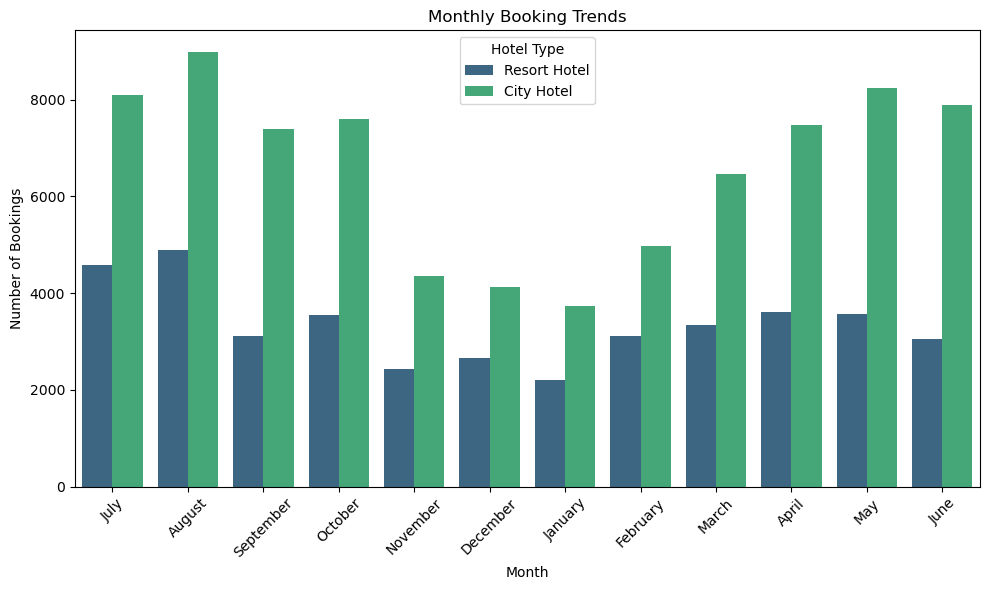

In [17]:
## 1. Monthly Booking Trends
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_date_month', hue='hotel', data=df, palette='viridis')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Hotel Type')
plt.tight_layout()
plt.show()

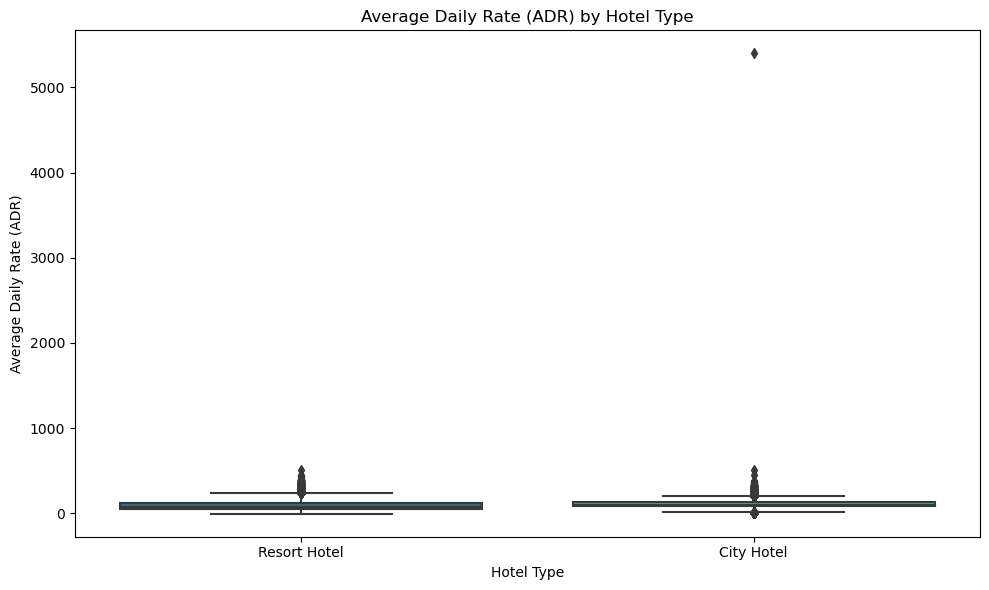

In [18]:
## 2. Average Daily Rate (ADR) Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', data=df, palette='viridis')
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.tight_layout()
plt.show()

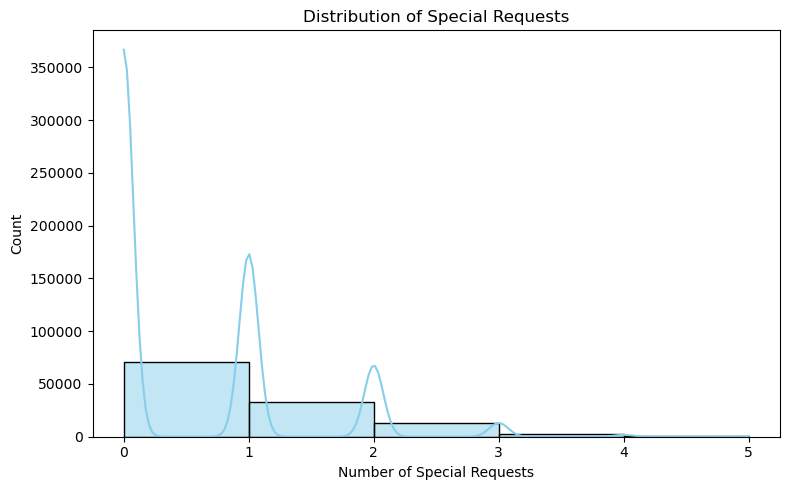

In [19]:
## 3. Special Requests Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['total_of_special_requests'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

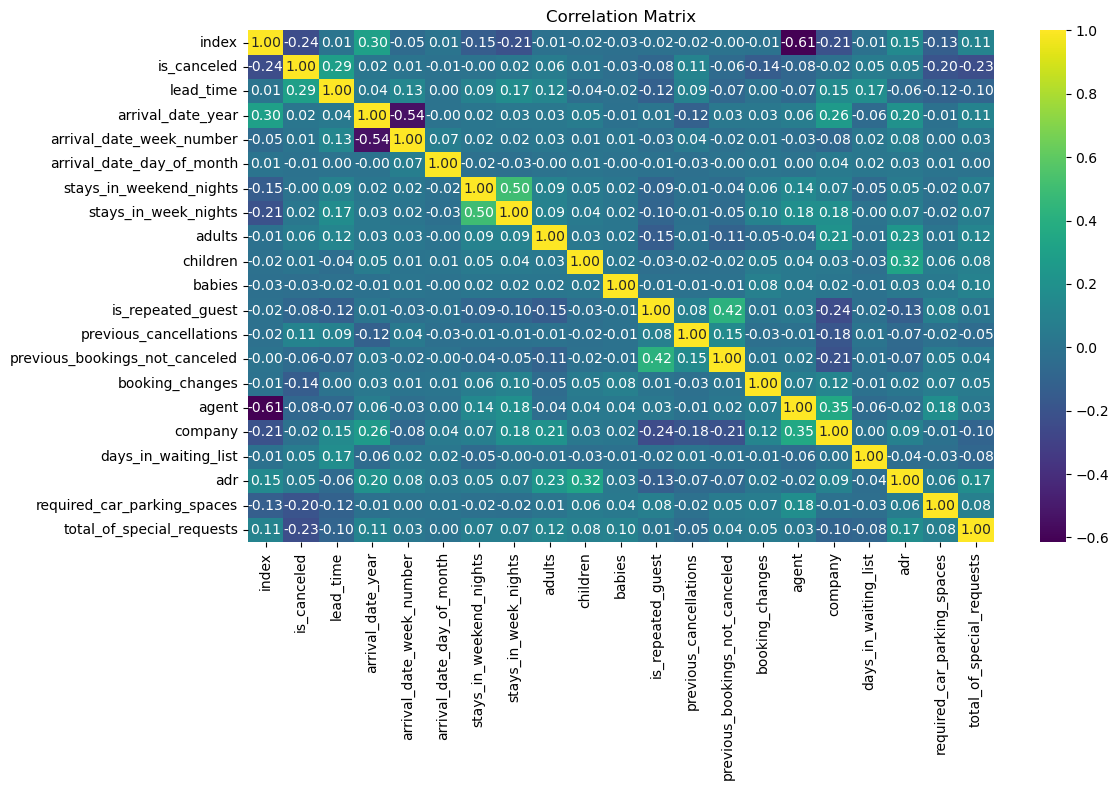

In [20]:
## 4. Correlation Matrix (numeric columns only)
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()